<a href="https://colab.research.google.com/github/pradhicsha6/Plant_Disease_Detection/blob/main/googlenet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/summer project/data/train'
valid_path = '/content/drive/MyDrive/summer project/data/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/summer project/data/train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/summer project/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/summer project/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 581s 9s/step - loss: 3.4369 - accuracy: 0.7130 - val_loss: 0.1549 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 231s 4s/step - loss: 0.4337 - accuracy: 0.9118 - val_loss: 0.3543 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 230s 4s/step - loss: 0.7090 - accuracy: 0.8816 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 230s 4s/step - loss: 0.4127 - accuracy: 0.9211 - val_loss: 1.0799e-04 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 230s 4s/step - loss: 0.5770 - accuracy: 0.9175 - val_loss: 1.0323e-04 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 230s 4s/step - loss: 0.5716 - accuracy: 0.9144 - val_loss: 0.2461 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 230s 4s/step - loss: 0.4371 - accuracy: 0.9359 - val_loss: 2.2522e-04 - val_accuracy: 1.0000
E

In [ ]:
pip install torchvision 

In [ ]:
import matplotlib.pyplot as plt

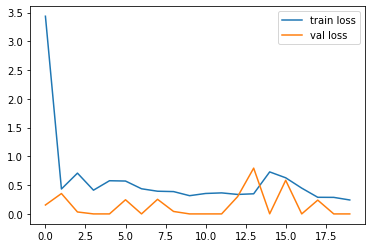

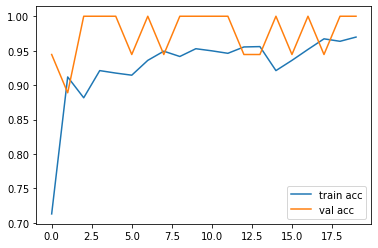

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
!mkdir -p saved_model
model.save('saved_model/Model_Inception.h5') 


In [ ]:
y_pred = model.predict(test_set)
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('saved_model/Model_Inception.h5')

In [ ]:
img_data

In [ ]:
mg=image.load_img('/content/drive/MyDrive/summer project/data/val/fresh cotton plant/dsd (140)_iaip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [5]:
import tensorflow as tf